<a href="https://colab.research.google.com/github/Cr1mson901/IntroToPyTorch/blob/main/03_computervision_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* 'torchvision' - base domain library for working with computer vision in PyTorch
* 'torchvision.datasets' - get datasets and data loading functions for computer vision
* 'torchvision.models' - get pretrained computer vision models that you can leverage for your own problems
* 'torchvision.transforms' - functions for manipulatin your vision data to be suitable for use
* 'torch.utils.data.Dataset' - Base dataset class for PyTorch
* torch.utils.data.Dataloader -creates a python iterable over a dataset

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import models
from torchvision.transforms import ToTensor
from torchvision import datasets
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Getting a dataset

The dataset that we will be using is  FashionMNIST

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data',#where to download data to
    train=True,#Do we want the training dataset
    download=True,
    transform=ToTensor(),#how to transform the data
    target_transform=None#how to transform the target
)
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10079252.10it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 181074.56it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2534283.12it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20447232.00it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
train_data.classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing our data

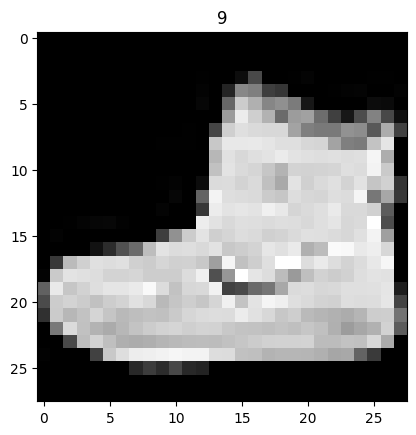

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.title(label)
plt.imshow(image.squeeze(), cmap='gray')


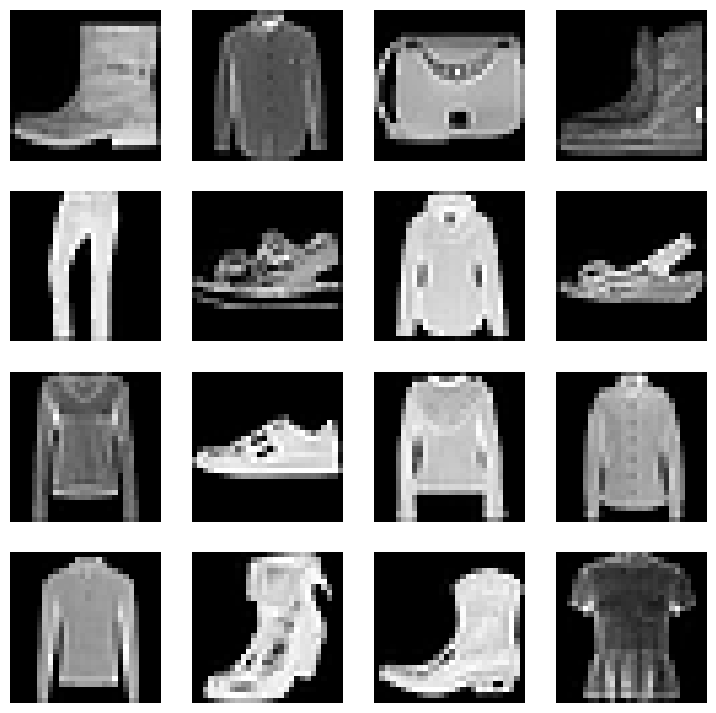

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.axis(False)


## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

We want to turn our data into batches (or mini-batches)

In [ ]:
## 2. Prepare DataLoader
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn Datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a9f38800040>,
 <torch.utils.data.dataloader.DataLoader at 0x7a9f388000a0>)

In [ ]:
len(test_dataloader)

313

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
#test_features_batch, test_labels_batch = next(iter(test_dataloader))


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

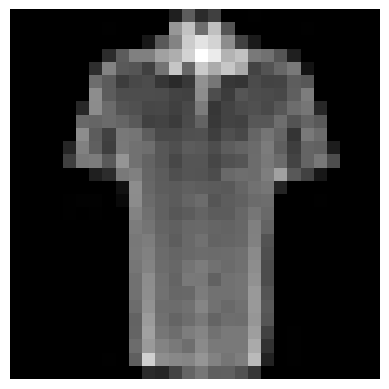

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.axis(False)


## 3. Model 0: Build a baseline model

When starting to build a seris of machine learning modelling experiments, it's best practice to start with a baseline model

In other word start simple then make it more complex

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

output = flatten_model(x)#takes the dimensions and combines them into a single vector

output.shape


torch.Size([1, 784])

In [ ]:
from torch import nn
class FashionMNISTModelv0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FashionMNISTModelv0(
    input_shape= 784,
    hidden_units=16,
    output_shape=10
).to('cpu')

model_0


FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.0599, -0.0578, -0.1531, -0.3557, -0.1761,  0.0471,  0.2426, -0.5298,
         -0.0458, -0.0342]], grad_fn=<AddmmBackward0>)

* Loss function - Since its multiclass we use CrossEntropy
* Optimizer we can use optim.SGD
* Evaluation metric - let's use accuracy

In [ ]:
# Create loss, optimizer, and eval metrics
import requests
from pathlib import Path
if Path('helper_functions.py').is_file():
  print('already there g')
else:
  print('Downloading')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_function.py', 'wb') as f:
    f.write(request.content)

Downloading


In [ ]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two things to keep track of
1. Time
2. Performance

In [ ]:
from timeit import default_timer as timer
def print_train_time(start, end, device=None):
  '''Prints difference between start and end time.'''
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

## Creating a traing loop and training a model on batches of data
1. Loop through epochs
2. Loop through testing batches, perform training steps caluculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time it all(for fun)

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):#tqdm is the progress bar
  print(epoch)
  train_loss = 0
  for batch, (x, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(x)
    loss = loss_fn(y_pred, y)
    train_loss += loss# accumelate the loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400 == 0:
      print(loss)
  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for (x_test, y_test) in test_dataloader:
      test_pred = model_0(x_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f'Train loss: {train_loss:.4f} Test Loss: {test_loss:.4f} Test Acc: {test_acc:.2f}')
train_time_end_on_cpu = timer()
print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, 'cpu')

  0%|          | 0/3 [00:00<?, ?it/s]

0
tensor(2.2760, grad_fn=<NllLossBackward0>)
tensor(0.6344, grad_fn=<NllLossBackward0>)
tensor(0.6464, grad_fn=<NllLossBackward0>)
tensor(0.3501, grad_fn=<NllLossBackward0>)
tensor(0.3594, grad_fn=<NllLossBackward0>)
Train loss: 1096.9847 Test Loss: 0.5062 Test Acc: 82.24
1
tensor(0.3735, grad_fn=<NllLossBackward0>)
tensor(0.6838, grad_fn=<NllLossBackward0>)
tensor(0.3810, grad_fn=<NllLossBackward0>)
tensor(0.6583, grad_fn=<NllLossBackward0>)
tensor(0.2783, grad_fn=<NllLossBackward0>)
Train loss: 890.6737 Test Loss: 0.4842 Test Acc: 83.07
2
tensor(0.3651, grad_fn=<NllLossBackward0>)
tensor(0.7407, grad_fn=<NllLossBackward0>)
tensor(0.2923, grad_fn=<NllLossBackward0>)
tensor(0.3980, grad_fn=<NllLossBackward0>)
tensor(0.3676, grad_fn=<NllLossBackward0>)
Train loss: 851.4219 Test Loss: 0.4770 Test Acc: 83.41
Train time on cpu: 28.112 seconds


28.112007973999994

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  '''returns a dict containing the results of model prediction on data_loader.'''
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {'model_name': model.__class__.__name__,
          "model_loss": loss.item(),
          'model_acc': acc}

model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.47699886560440063,
 'model_acc': 83.40654952076677}

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class FashionMNISTModelv1(nn.Module):
  def __init__(self, input_value, hidden_layer, output_value):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_value, hidden_layer),
        nn.ReLU(),
        nn.Linear(hidden_layer, output_value),
        nn.ReLU()
    )
  def forward(self, x):
    return self.layer_stack(x)


In [ ]:
model_1 = FashionMNISTModelv1(784,16,10).to(device)
model_1

FashionMNISTModelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=.1)

In [ ]:


train_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(epoch)
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_1.train()
    train_preds = model_1(X.to(device))
    loss = loss_fn(train_preds, y.to(device))
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400 == 0:
      print(loss)
  train_loss / len(train_dataloader)

  test_loss, test_acc = 0,0
  model_1.eval()
  with torch.inference_mode():
    for (x_test, y_test) in test_dataloader:
      test_pred = model_1(x_test.to(device))
      test_loss += loss_fn(test_pred, y_test.to(device))
      test_acc += accuracy_fn(y_test.to(device), test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f'Train loss: {train_loss:.4f} Test Loss: {test_loss:.4f} Test Acc: {test_acc:.2f}')
train_time_end_on_gpu = timer()
print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, 'gpu')

  0%|          | 0/3 [00:00<?, ?it/s]

0
tensor(2.3255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3564, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9346, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7097, device='cuda:0', grad_fn=<NllLossBackward0>)
Train loss: 1792.7125 Test Loss: 0.7055 Test Acc: 74.30
1
tensor(0.6768, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7609, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6622, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4911, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7436, device='cuda:0', grad_fn=<NllLossBackward0>)
Train loss: 1253.6699 Test Loss: 0.6849 Test Acc: 75.08
2
tensor(0.5675, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8407, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6730, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5585, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6999, device='cuda:0', grad_fn=<N

29.768249949999927